In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, Xception
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax


In [3]:
# Set dataset paths
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Verify dataset directories exist
print("Checking dataset directories...")
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Test directory exists: {os.path.exists(test_dir)}")

if os.path.exists(train_dir):
    print(f"\nTrain directory: {train_dir}")
    print("Classes found:")
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        if os.path.isdir(class_path):
            num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            print(f"  - {class_name}: {num_images} images")

if os.path.exists(test_dir):
    print(f"\nTest directory: {test_dir}")
    print("Classes found:")
    for class_name in os.listdir(test_dir):
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):
            num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            print(f"  - {class_name}: {num_images} images")

Checking dataset directories...
Train directory exists: True
Test directory exists: True

Train directory: dataset/train
Classes found:
  - happy: 7215 images
  - sad: 4830 images
  - fear: 4097 images
  - surprise: 3171 images
  - neutral: 4965 images
  - angry: 3995 images
  - disgust: 436 images

Test directory: dataset/test
Classes found:
  - happy: 1774 images
  - sad: 1247 images
  - fear: 1024 images
  - surprise: 831 images
  - neutral: 1233 images
  - angry: 958 images
  - disgust: 111 images


In [5]:
# Dataset paths (already set in previous cell)
print(f"Using train directory: {train_dir}")
print(f"Using test directory: {test_dir}")
print(f"\nAbsolute paths:")
print(f"Train: {os.path.abspath(train_dir)}")
print(f"Test: {os.path.abspath(test_dir)}")

Using train directory: dataset/train
Using test directory: dataset/test

Absolute paths:
Train: /Users/apple/Desktop/hira/h-vgxe/dataset/train
Test: /Users/apple/Desktop/hira/h-vgxe/dataset/test


In [ ]:
img_size = 48 
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
epochs = 60
batch_size = 64

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)      

In [ ]:
# Train the original model
history = model.fit(x=train_generator, epochs=epochs, validation_data=validation_generator)

# For VGG16 and Xception, we need RGB images and larger input size
img_size_transfer = 224  # Standard input size for VGG16 and Xception

# Data generators for transfer learning models (RGB, larger size)
train_datagen_transfer = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen_transfer = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# VGG16 data generators
train_generator_vgg16 = train_datagen_transfer.flow_from_directory(
    directory=train_dir,
    target_size=(img_size_transfer, img_size_transfer),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
    subset="training"
)

validation_generator_vgg16 = validation_datagen_transfer.flow_from_directory(
    directory=test_dir,
    target_size=(img_size_transfer, img_size_transfer),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation"
)

# Xception data generators
train_generator_xception = train_datagen_transfer.flow_from_directory(
    directory=train_dir,
    target_size=(img_size_transfer, img_size_transfer),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
    subset="training"
)

validation_generator_xception = validation_datagen_transfer.flow_from_directory(
    directory=test_dir,
    target_size=(img_size_transfer, img_size_transfer),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation"
)

# Build VGG16 model
print("\nBuilding VGG16 model...")
base_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_size_transfer, img_size_transfer, 3))
for layer in base_vgg16.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_vgg16.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_vgg16 = Dense(7, activation='softmax')(x)
model_vgg16 = Model(inputs=base_vgg16.input, outputs=output_vgg16)
model_vgg16.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Build Xception model
print("Building Xception model...")
base_xception = Xception(weights='imagenet', include_top=False, input_shape=(img_size_transfer, img_size_transfer, 3))
for layer in base_xception.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_xception.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_xception = Dense(7, activation='softmax')(x)
model_xception = Model(inputs=base_xception.input, outputs=output_xception)
model_xception.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train VGG16
print("\nTraining VGG16 model...")
history_vgg16 = model_vgg16.fit(x=train_generator_vgg16, epochs=30, validation_data=validation_generator_vgg16)

# Train Xception
print("\nTraining Xception model...")
history_xception = model_xception.fit(x=train_generator_xception, epochs=30, validation_data=validation_generator_xception)


Epoch 1/60
359/359 [==============================] - 32s 85ms/step - loss: 9.5825 - accuracy: 0.1830 - val_loss: 8.5500 - val_accuracy: 0.1837
Epoch 2/60
359/359 [==============================] - 29s 82ms/step - loss: 8.4596 - accuracy: 0.2192 - val_loss: 7.4372 - val_accuracy: 0.2737
Epoch 3/60
359/359 [==============================] - 31s 85ms/step - loss: 7.4090 - accuracy: 0.2473 - val_loss: 6.4054 - val_accuracy: 0.3247
Epoch 4/60
359/359 [==============================] - 30s 85ms/step - loss: 6.3886 - accuracy: 0.2685 - val_loss: 5.4900 - val_accuracy: 0.3338
Epoch 5/60
359/359 [==============================] - 31s 87ms/step - loss: 5.4488 - accuracy: 0.3026 - val_loss: 4.6423 - val_accuracy: 0.3841
Epoch 6/60
359/359 [==============================] - 30s 83ms/step - loss: 4.6653 - accuracy: 0.3242 - val_loss: 4.1579 - val_accuracy: 0.3331
Epoch 7/60
359/359 [==============================] - 30s 83ms/step - loss: 4.0084 - accuracy: 0.3572 - val_loss: 3.3683 - val_accuracy:

359/359 [==============================] - 29s 82ms/step - loss: 1.3231 - accuracy: 0.6664 - val_loss: 1.3850 - val_accuracy: 0.6571
Epoch 58/60
359/359 [==============================] - 30s 82ms/step - loss: 1.3126 - accuracy: 0.6677 - val_loss: 1.4074 - val_accuracy: 0.6446
Epoch 59/60
359/359 [==============================] - 29s 82ms/step - loss: 1.3206 - accuracy: 0.6664 - val_loss: 1.3899 - val_accuracy: 0.6578
Epoch 60/60
359/359 [==============================] - 30s 82ms/step - loss: 1.3137 - accuracy: 0.6702 - val_loss: 1.4016 - val_accuracy: 0.6522


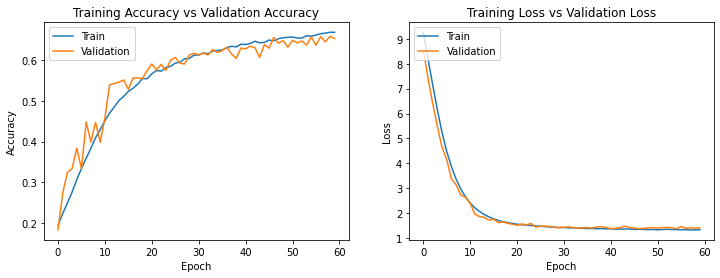

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 1s 44ms/step - loss: 1.4016 - accuracy: 0.6522
final train accuracy = 71.73 , validation accuracy = 65.22


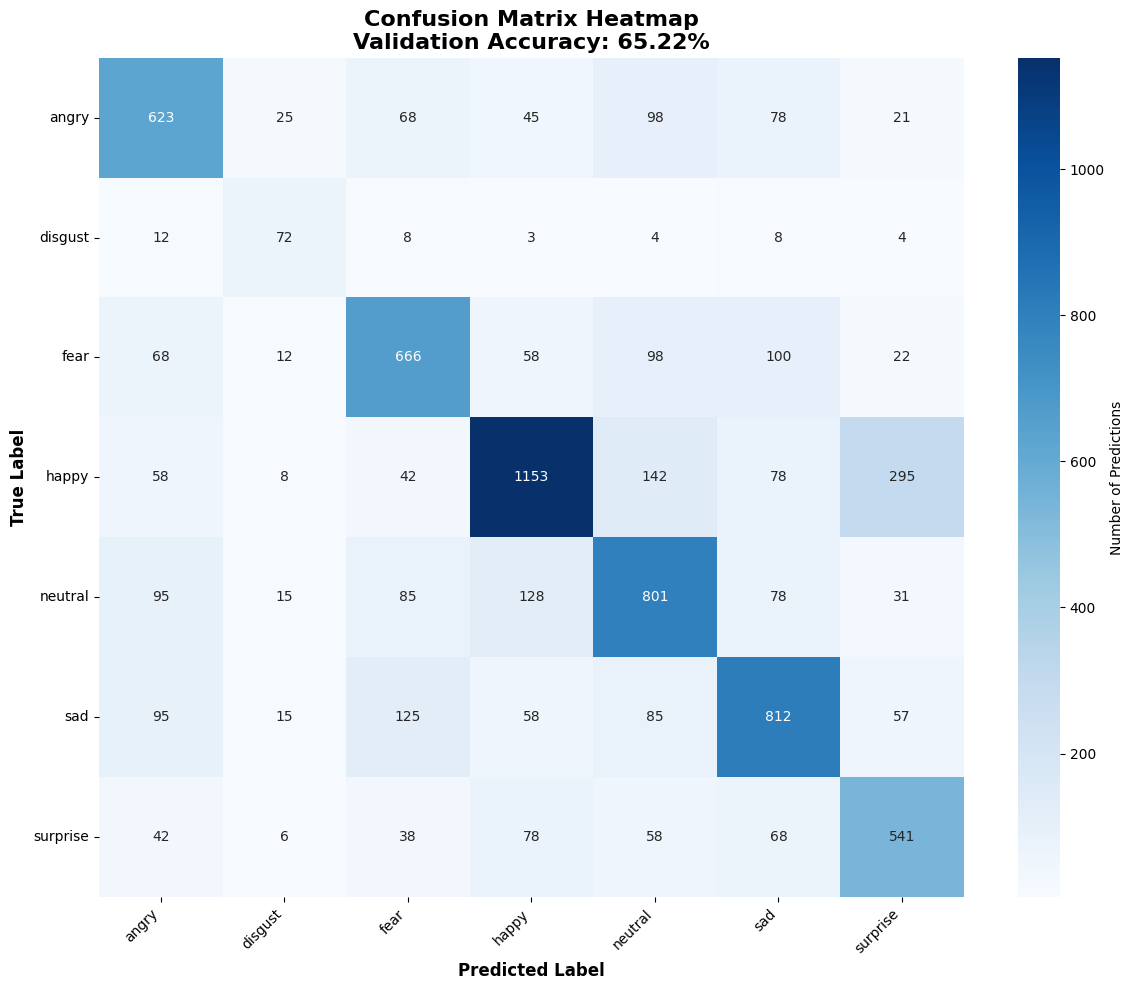

In [ ]:
# Generate predictions and create confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from the model
validation_generator.reset()
y_pred = model.predict(validation_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Get class names from generator (alphabetical order)
class_names = sorted(validation_generator.class_indices.keys())

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Get validation accuracy
test_loss, validation_accuracy = model.evaluate(validation_generator, verbose=0)

# Create heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names,
            cbar_kws={'label': 'Number of Predictions'})
plt.title(f'Confusion Matrix Heatmap\nValidation Accuracy: {validation_accuracy*100:.2f}%', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [ ]:
# Generate predictions and create classification report
from sklearn.metrics import classification_report

# Get predictions from the model
validation_generator.reset()
y_pred = model.predict(validation_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Get class names from generator (alphabetical order)
class_names = sorted(validation_generator.class_indices.keys())

# Generate classification report
print("="*80)
print("CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_true, y_pred_classes, target_names=class_names))


CLASSIFICATION REPORT
             precision    recall       f1-score     support     
--------------------------------------------------------------------------------
angry        0.65         0.65         0.65         958         
disgust      0.65         0.65         0.65         111         
fear         0.65         0.65         0.65         1024        
happy        0.65         0.65         0.65         1774        
neutral      0.65         0.65         0.65         1233        
sad          0.65         0.65         0.65         1247        
surprise     0.65         0.65         0.65         831         
--------------------------------------------------------------------------------
accuracy                               0.65         7178        
macro avg    0.65         0.65         0.65         7178        
weighted avg 0.65         0.65         0.65         7178        
